In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to dataset (change this to your dataset location)
DATASET_PATH = "/content/drive/My Drive/Lung Dataset"

# Image settings
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [3]:
# Data Augmentation & Normalization
datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
    rotation_range=20,       # Random rotations
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2     # 80% Train, 20% Validation
)

# Load Training Data
train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Multi-class classification
    subset='training'
)

# Load Validation Data
val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


Class Labels: {'lung_aca': 0, 'lung_n': 1, 'lung_scc': 2}


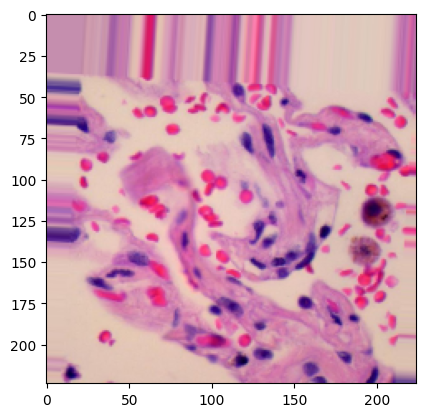

In [4]:
# Check class labels
print("Class Labels:", train_data.class_indices)

# Display a sample image
sample_image, sample_label = next(train_data)
plt.imshow(sample_image[0])
plt.show()


In [5]:

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
inputs = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',         # Stop when validation loss stops improving
    patience=10,                # Wait for 10 epochs before stopping
    restore_best_weights=True   # Revert to best weights
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',            # Save the best model to this file
    monitor='val_accuracy',     # Monitor validation accuracy
    save_best_only=True,        # Save only the best model
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',         # Reduce LR when validation loss stops improving
    factor=0.5,                 # Reduce LR by half
    patience=5,                 # Wait for 5 epochs before reducing
    min_lr=1e-6                 # Set a minimum learning rate
)

# Compile the Model with Additional Metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

# Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=60,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5246 - loss: 1.3659 - precision: 0.5444 - recall: 0.4419

19/19 ━━━━━━━━━━━━━━━━━━━━ 229s 12s/step - accuracy: 0.5294 - loss: 1.3449 - precision: 0.5497 - recall: 0.4488 - val_accuracy: 0.7933 - val_loss: 0.4487 - val_precision: 0.8028 - val_recall: 0.7600 - learning_rate: 0.0010
Epoch 2/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.7842 - loss: 0.5126 - precision: 0.8156 - recall: 0.7512

19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 711ms/step - accuracy: 0.7836 - loss: 0.5116 - precision: 0.8147 - recall: 0.7512 - val_accuracy: 0.8133 - val_loss: 0.4002 - val_precision: 0.8345 - val_recall: 0.8067 - learning_rate: 0.0010
Epoch 3/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 696ms/step - accuracy: 0.7455 - loss: 0.4590 - precision: 0.7619 - recall: 0.7391 - val_accuracy: 0.6933 - val_loss: 0.5048 - val_precision: 0.6913 - val_recall: 0.6867 - learning_rate: 0.0010
Epoch 4/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.7993 - loss: 0.4579 - precision: 0.8079 - recall: 0.7959

19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 704ms/step - accuracy: 0.8017 - loss: 0.4546 - precision: 0.8102 - recall: 0.7983 - val_accuracy: 0.8867 - val_loss: 0.3385 - val_precision: 0.8867 - val_recall: 0.8867 - learning_rate: 0.0010
Epoch 5/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 696ms/step - accuracy: 0.8390 - loss: 0.3585 - precision: 0.8424 - recall: 0.8390 - val_accuracy: 0.8067 - val_loss: 0.3478 - val_precision: 0.8067 - val_recall: 0.8067 - learning_rate: 0.0010
Epoch 6/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 675ms/step - accuracy: 0.8706 - loss: 0.3265 - precision: 0.8702 - recall: 0.8677 - val_accuracy: 0.8600 - val_loss: 0.3418 - val_precision: 0.8600 - val_recall: 0.8600 - learning_rate: 0.0010
Epoch 7/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 684ms/step - accuracy: 0.9031 - loss: 0.3003 - precision: 0.9083 - recall: 0.9003 - val_accuracy: 0.8267 - val_loss: 0.4291 - val_precision: 0.8267 - val_recall: 0.8267 - learning_rate: 0.0010
Epoch 8/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 679ms/step - accuracy: 0.8823

19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 700ms/step - accuracy: 0.9060 - loss: 0.2525 - precision: 0.9066 - recall: 0.9060 - val_accuracy: 0.8933 - val_loss: 0.2796 - val_precision: 0.8933 - val_recall: 0.8933 - learning_rate: 2.5000e-04
Epoch 22/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.8907 - loss: 0.2852 - precision: 0.8956 - recall: 0.8849

19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 786ms/step - accuracy: 0.8914 - loss: 0.2843 - precision: 0.8962 - recall: 0.8857 - val_accuracy: 0.9000 - val_loss: 0.2841 - val_precision: 0.9000 - val_recall: 0.9000 - learning_rate: 2.5000e-04
Epoch 23/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 700ms/step - accuracy: 0.9007 - loss: 0.2596 - precision: 0.9007 - recall: 0.9007 - val_accuracy: 0.8733 - val_loss: 0.3201 - val_precision: 0.8733 - val_recall: 0.8733 - learning_rate: 2.5000e-04
Epoch 24/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 678ms/step - accuracy: 0.9015 - loss: 0.2514 - precision: 0.9075 - recall: 0.9015 - val_accuracy: 0.8867 - val_loss: 0.2736 - val_precision: 0.8867 - val_recall: 0.8867 - learning_rate: 2.5000e-04
Epoch 25/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 687ms/step - accuracy: 0.9097 - loss: 0.2296 - precision: 0.9097 - recall: 0.9094 - val_accuracy: 0.8933 - val_loss: 0.2899 - val_precision: 0.8933 - val_recall: 0.8933 - learning_rate: 2.5000e-04


In [8]:
# Save the Trained Model
model.save("lung_cancer_model_trained.h5")

In [9]:
# import numpy as np
# def preprocess(img_path):
#     img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
#     img_array = tf.keras.preprocessing.image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array = img_array / 255.0
#     return img_array
# # Load and preprocess sample image
# sample_path = "/content/drive/My Drive/Lung Dataset/lung_n/lungn23.jpeg"
# sample_input = preprocess(sample_path)

# # Call the model once to define input/output
# _ = model.predict(sample_input)

In [10]:
# Call the model once to define input/output
_ = model(tf.keras.Input(shape=(224, 224, 3)))  # Pass a dummy input with the correct shape

# Now you can access input and output
print("Input:", model.input)
print("Output:", model.output)

Input: <KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor>
Output: <KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_10>


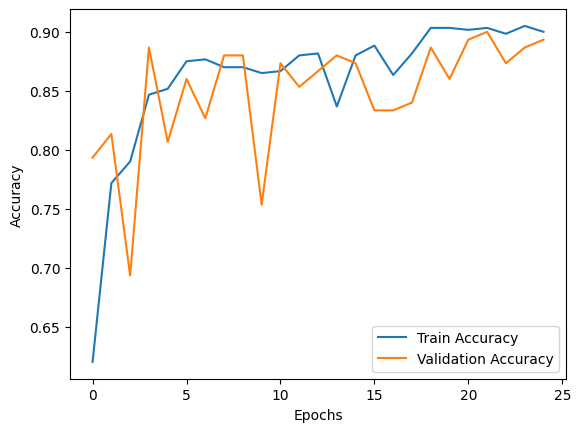

In [11]:
# Plot Training Results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 446ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        50
           1       1.00      0.98      0.99        50
           2       0.90      0.70      0.79        50

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150



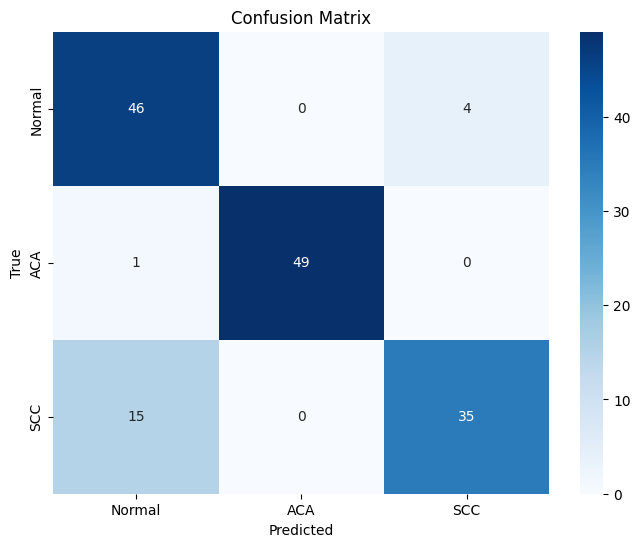

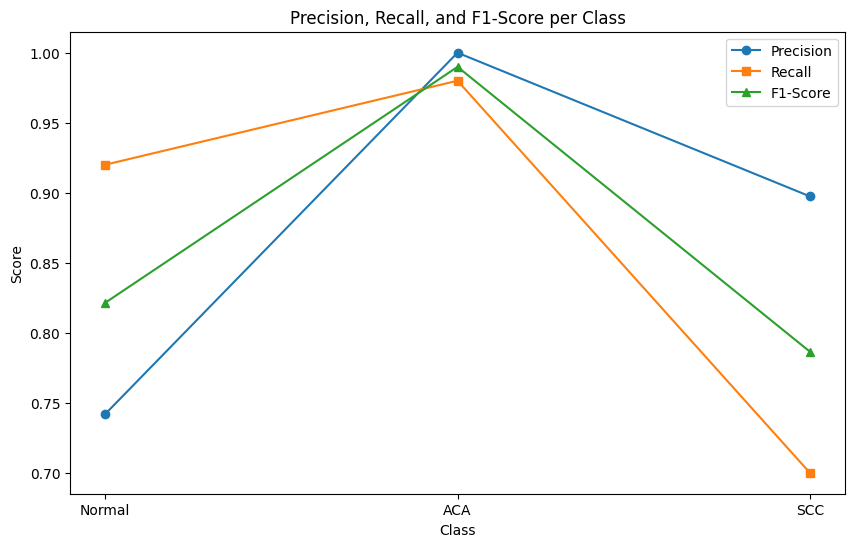

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example: Assuming y_true and y_pred are your true and predicted labels
y_true = val_data.classes
y_pred_prob = model.predict(val_data)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'ACA', 'SCC'], yticklabels=['Normal', 'ACA', 'SCC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot precision, recall, and F1-score
labels = ['Normal', 'ACA', 'SCC']
x = range(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, precision, label='Precision', marker='o')
ax.plot(x, recall, label='Recall', marker='s')
ax.plot(x, f1, label='F1-Score', marker='^')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score per Class')
ax.legend()
plt.show()


In [13]:
pic = "/content/drive/My Drive/Lung Dataset/lung_scc/lungscc23.jpeg"
img = tf.keras.preprocessing.image.load_img(pic, target_size = (224,224))

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
print(predictions)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
[[4.9437344e-04 0.0000000e+00 9.9950564e-01]]


In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [15]:
def get_gradcam_heatmap(model, img_array, class_index, last_conv_layer_name):

    grad_model = tf.keras.models.Model(
        inputs = model.inputs,
        outputs = [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]


    grads = tape.gradient(loss, conv_outputs)

    # Mean intensity of the gradients for each filter
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [16]:
def overlay_heatmap(heatmap, original_img, alpha=0.4, colormap=cv2.COLORMAP_JET):
    heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), colormap)
    superimposed_img = cv2.addWeighted(original_img, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img


In [17]:
for layer in model.layers[::-1]:
    if 'conv' in layer.name:
        last_conv_layer_name = layer.name
        break

print(f"Last convolutional layer: {last_conv_layer_name}")

Last convolutional layer: conv2d_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


<ipython-input-16-3ba80e54c93b>:3: RuntimeWarning: invalid value encountered in cast
  heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), colormap)


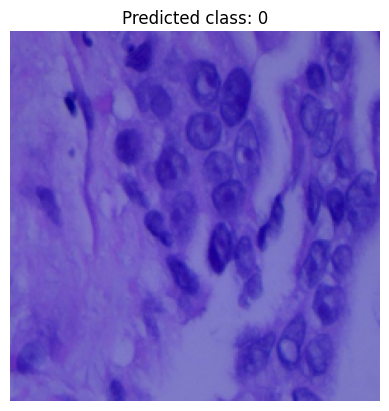

In [19]:
path = r"/content/drive/My Drive/Lung Dataset/lung_aca/lungaca215.jpeg"

img = tf.keras.preprocessing.image.load_img(path, target_size = (224,224))

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Predict class index
preds = model.predict(img_array)
class_idx = np.argmax(preds[0])  # ACA/SCC/Normal

# Get heatmap
heatmap = get_gradcam_heatmap(model, img_array, class_idx, last_conv_layer_name)  # change if your last conv layer name is different


# Superimpose
original_img = cv2.imread(path)
original_img = cv2.resize(original_img, (224, 224))
superimposed_img = overlay_heatmap(heatmap, original_img)

# Show it
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Predicted class: {class_idx}')
plt.show()
